#  Gear design

Example from [[1]](#1) page 434. The objective of the task is to find the optimal turn numbers of a gearbox gear's. The gearbox contains for gears, the required gear ratio is 1/6.931, the number of the teeth must be integer numbers, all of these four variables must to be integers.

The variable vector:    $ \vec{x} = (x_1, x_2, x_3, x_4) = (T_d, T_b, T_a, T_f)$

The problem can be formulated as a two variable optimization function. The first goal function's role is to minimize the  error between the obtained and the realized gear ratio:

Minimize 
$$
F_1 = \left( \frac{1}{6.931} -  \frac{x_1 \cdot x_2}{x_3 \cdot x_4} \right) ^2.
$$
where $x$ is the solution vector, contains the number of the teeths, these numbers
are strictly integers

Minimize 
$$
F_2 = \max(x_1, x_2, x_3, x_4)
$$
subject to
$$
\begin{eqnarray*}
        x_1 &\in& [12, 60]  \subset \mathbb{Z},  \\
        x_2 &\in& [12, 60]  \subset \mathbb{Z},  \\
        x_3 &\in& [12, 60]  \subset \mathbb{Z},  \\
        x_4 &\in& [12, 60]  \subset \mathbb{Z}.
\end{eqnarray*}
$$

The were published two extremal solution in [[1]](#1):

- solution E : $x = (12, 12, 27, 37)$; Error $F_1 = 1.83\cdot 10^{-8}$; Max teeth number = 37
- solution D : $x = (12, 12, 13, 13)$; Error $F_1 = 5.01\cdot 10^{-1}$; Max teeth number = 13

2022-02-07 09:18:52,282 (INFO): GearDesignProblem-268989 - run (146) - NSGA_II: 100/10000
2022-02-07 09:18:58,320 (INFO): GearDesignProblem-268989 - run (173) - NSGA_II: elapsed time: 6.037979364395142 s


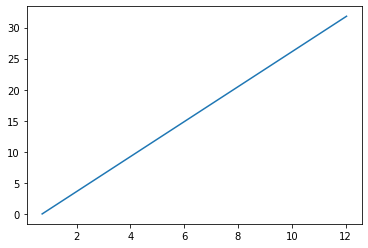

In [4]:
from artap.problem import Problem
from artap.algorithm_genetic import NSGAII
from artap.results import Results

import matplotlib.pyplot as plt


class GearDesignProblem(Problem):

    def set(self):

        # Not mandatory to give a name for the test problem
        self.name = 'Gear Design'

        # Defines x_1 and x_2, which are the optimized parameters
        # and the bounds 'defines' the constraints of the optimization problem
        # nsga -- ii algorithm doesn't need an initial value for the definition
        self.parameters = [{'name':'x1', 'bounds': [12, 60], 'parameter_type':'integer'},
                           {'name':'x2', 'bounds': [12, 60], 'parameter_type':'integer'},
                           {'name':'x3', 'bounds': [12, 60], 'parameter_type':'integer'},
                           {'name':'x4', 'bounds': [12, 60], 'parameter_type':'integer'}]

        # The two, separate optimization functions and the direction of the optimization
        # is set to minimization. It is also possible to use the maximize keyword.
        self.costs = [{'name': 'f_1', 'criteria': 'minimize'},
                      {'name': 'f_2', 'criteria': 'minimize'}]

    def evaluate(self, x):
        f1 = (1./6.931 - (x.vector[0]*x.vector[1])/(x.vector[2]*x.vector[3]))**2.
        f2 = max(x.vector)
        return [f1, f2]


# Initialization of the problem
problem = GearDesignProblem()

# Perform the optimization iterating over 100 times on 100 individuals.
algorithm = NSGAII(problem)
algorithm.options['max_population_number'] = 100
algorithm.options['max_population_size'] = 100
algorithm.run()

# Post - processing the results
# reads in the result values into the b, results class
b = Results(problem)

# finding the pareto values
table = b.pareto_values()
plt.plot(table[0], table[1])
plt.show()

##  References

<a id="1">[1]</a>  Deb, Kalyan. (2001). Multiobjective Optimization Using Evolutionary Algorithms. Wiley, New York. 